In [40]:
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline 

Not all data are linearly separable in the n-dimensional space that the data naturally exist in, but this is why we transform the data into a space that IS linearly separable

<img src = "transform.png" width=500 height=400/>

The simplest example of such a transofrmation is introducing some 2nd order polynomial terms into the features to extend to 2D input space

In [32]:
# Here are 2 points in 2D space 

a = np.array([1,2])
b = np.array([3,2])

In [33]:
# First, some definitions, The Dot Product and Inner Product are the same in Here because 2D is finite
# The dot product is the name given to the inner product on a finite dimensional Euclidean space

print(np.dot(a,b))
print(np.inner(a,b))

7
7


In [34]:
# The Kernel is defined as K(x,x') = z(x) • z(x')

# Z space is the 2+ dimensional space that will allow us to linearly separate points in x space that
# and not linearly separable in x space 

def polynomial_z_space(x):
    ''' x should be a 2-dimensional vector '''
    return np.array([1, x[0]**2, x[1]**2, math.sqrt(2)*x[0], math.sqrt(2)*x[1], math.sqrt(2)*x[0]*x[1]])

z = polynomial_z_space(a)

print(z)

[1.         1.         4.         1.41421356 2.82842712 2.82842712]


In [35]:
# z(x) • z(x') where z is polynomial_z_space is the polynomial kernel aka K(x,x')

def polynomial_kernel(x,x_):
    ''' x and x_ should be a 2-dimensional vector '''
    return (1 + np.inner(x, x_))**2

print(polynomial_kernel(a,b))
print(np.inner(polynomial_z_space(a),polynomial_z_space(b)))


64
64.0


In [36]:
# https://github.com/SSaishruthi/SVM-using-Numpy
# https://medium.com/@saishruthi.tn/support-vector-machine-using-numpy-846f83f4183d

# https://github.com/ElefHead/kernel-svm
# https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf

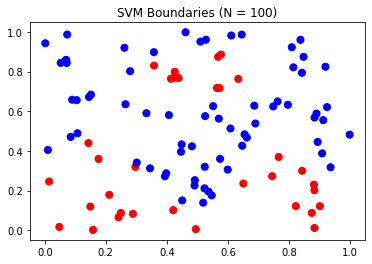

In [42]:
# in the code # https://github.com/ElefHead/kernel-svm # this is the problem to be solved
# to separate the red and blue dots

def get_data(lower,upper,num,num_dims):
	return np.random.uniform(lower,upper,size=(num,num_dims))

def get_labels(X):
	Y = []
	for x1,x2 in X:
		if x2 < np.sin(10*x1)/5 + 0.3 or ((x2 - 0.8)**2 + (x1 - 0.5)**2)<0.15**2:
			Y.append(1)
		else:
			Y.append(-1)
	return np.asarray(Y)

N = 100
data = get_data(0,1,N,2) 
labels = get_labels(data).reshape(-1)
predictions = np.ones_like(labels)*-1

color = np.where(labels==1,"orange","green")
plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap=plt.cm.bwr)
plt.title('SVM Boundaries (N = %d)' % (N))
plt.show()

In [ ]:
# Lets instead use the kernel in this simpler example

# https://github.com/SSaishruthi/SVM-using-Numpy
# https://medium.com/@saishruthi.tn/support-vector-machine-using-numpy-846f83f4183d